In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())
plt.rcParams["font.family"] = "NanumGothic"

C:\Users\qkfkd\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [3]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

train_df.drop("id", axis = 1, inplace = True)
test_df.drop("id", axis = 1, inplace = True)

In [4]:
print(f'train의 구조 {train_df.shape}')
print(f'test의 구조 {test_df.shape}')
print(f'submission의 구조 {submission.shape}')

train의 구조 (1350, 14)
test의 구조 (1350, 13)
submission의 구조 (1350, 2)


In [5]:
# 전체 컬럼들 기준으로 중복값 제거
train_df = train_df.drop_duplicates()
print("제거 후 : ", train_df.shape)

제거 후 :  (1349, 14)


In [6]:
train_df.head()

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1349 non-null   int64 
 1   Gr Liv Area     1349 non-null   int64 
 2   Exter Qual      1349 non-null   object
 3   Garage Cars     1349 non-null   int64 
 4   Garage Area     1349 non-null   int64 
 5   Kitchen Qual    1349 non-null   object
 6   Total Bsmt SF   1349 non-null   int64 
 7   1st Flr SF      1349 non-null   int64 
 8   Bsmt Qual       1349 non-null   object
 9   Full Bath       1349 non-null   int64 
 10  Year Built      1349 non-null   int64 
 11  Year Remod/Add  1349 non-null   int64 
 12  Garage Yr Blt   1349 non-null   int64 
 13  target          1349 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 158.1+ KB


In [8]:
numeric_features = train_df.columns[(train_df.dtypes == "float64") | (train_df.dtypes == "int64")]

categorical_features = train_df.columns[(train_df.dtypes == "O")]

print("수치형 데이터는 다음과 같습니다. \n ", list(numeric_features))
print("범주형 데이터는 다음과 같습니다. \n ", list(categorical_features))

수치형 데이터는 다음과 같습니다. 
  ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
범주형 데이터는 다음과 같습니다. 
  ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


In [9]:
cols1=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars', 'target']
train_df = train_df[cols1]

cols2=['Year Built', 'Year Remod/Add', 'Garage Yr Blt',  'Overall Qual', 'Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Full Bath', 'Garage Cars']
test_df=test_df[cols2]
train_df.head(3)

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000


# train.csv : 학습 데이터
- id : 데이터 고유 id (drop)
- OverallQual : 전반적 재료와 마감 품질
- KitchenQual : 부억 품질 
- ExterQual : 외관 재료 품질

- YearBuilt : 완공 연도
- YearRemodAdd : 리모델링 연도
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 

- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

## 수치형 데이터는 다음과 같음
- 이상치 나타나는 feature : 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Garage Yr Blt', 'target'

In [10]:
numeric_features

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')

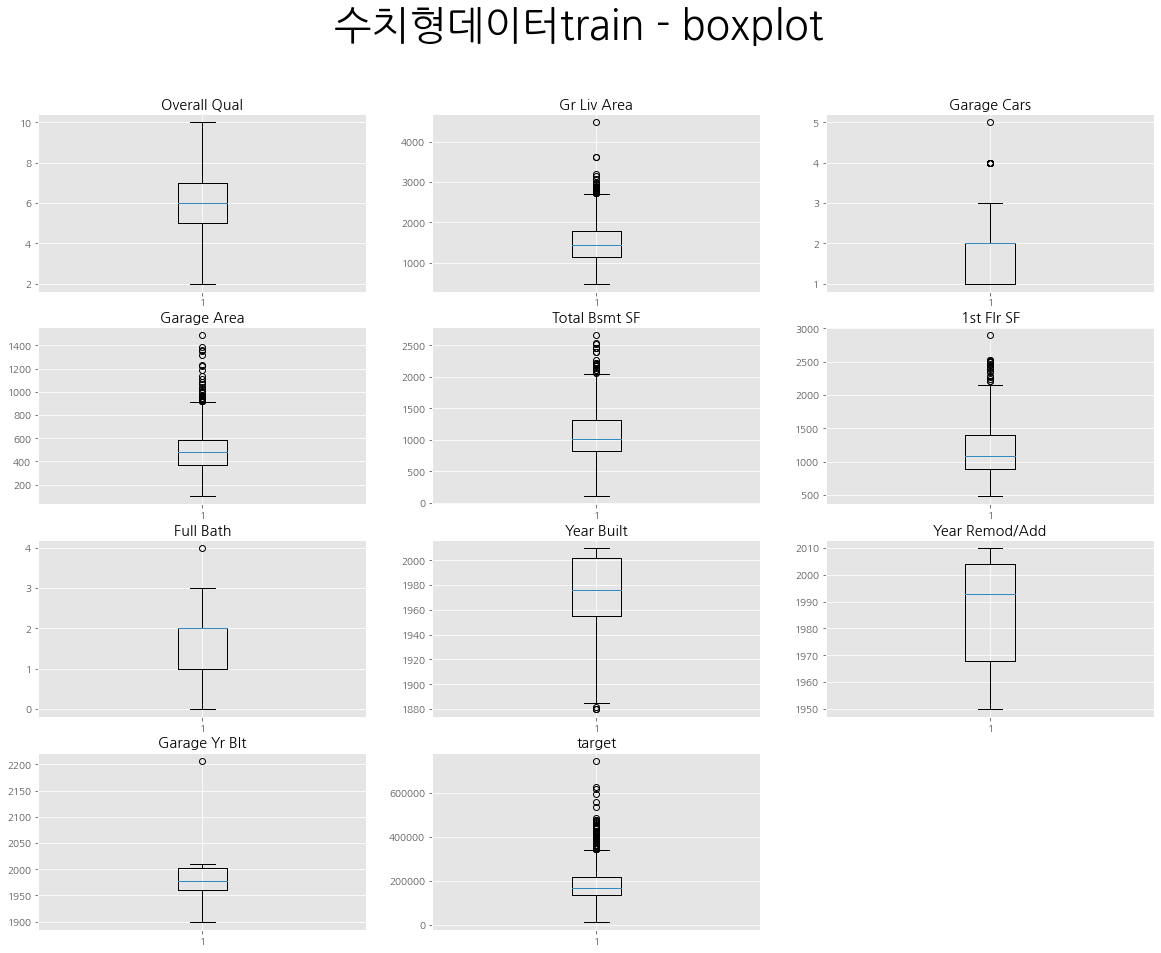

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터train - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train_df[feature[i]])
plt.show()

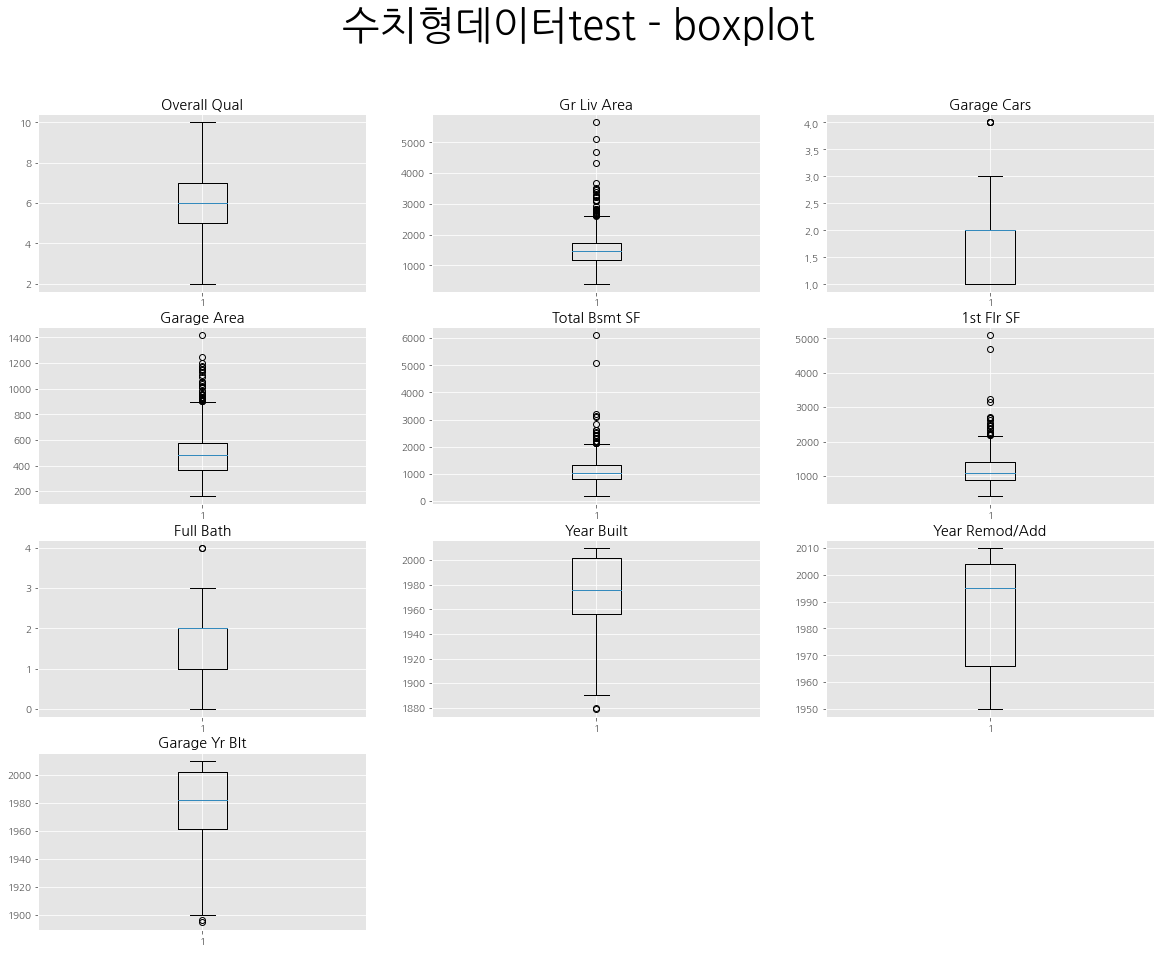

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

numeric_features_del_target = list(numeric_features)
numeric_features_del_target.remove('target')
feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터test - boxplot", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(test_df[feature[i]])
plt.show()

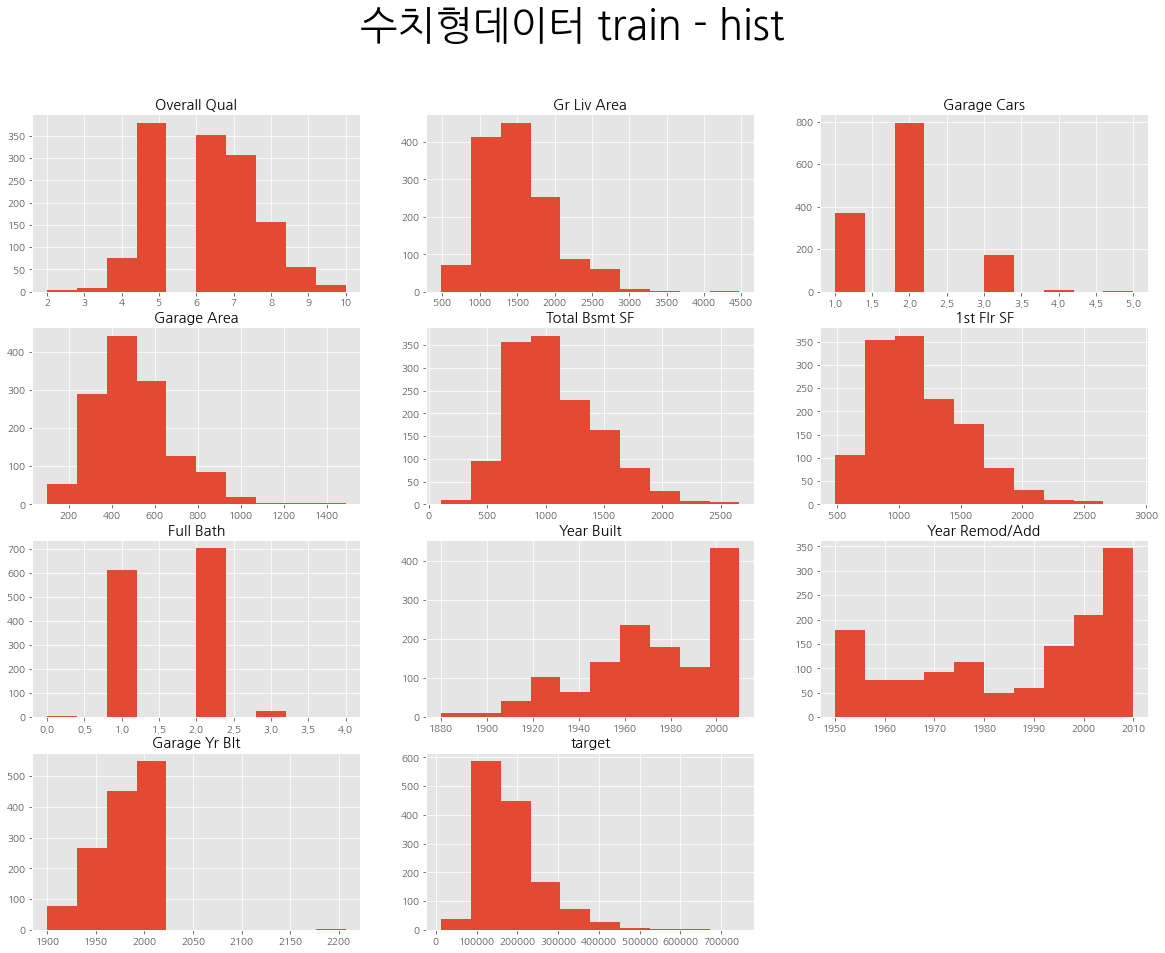

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 train - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(train_df[feature[i]])
plt.show()

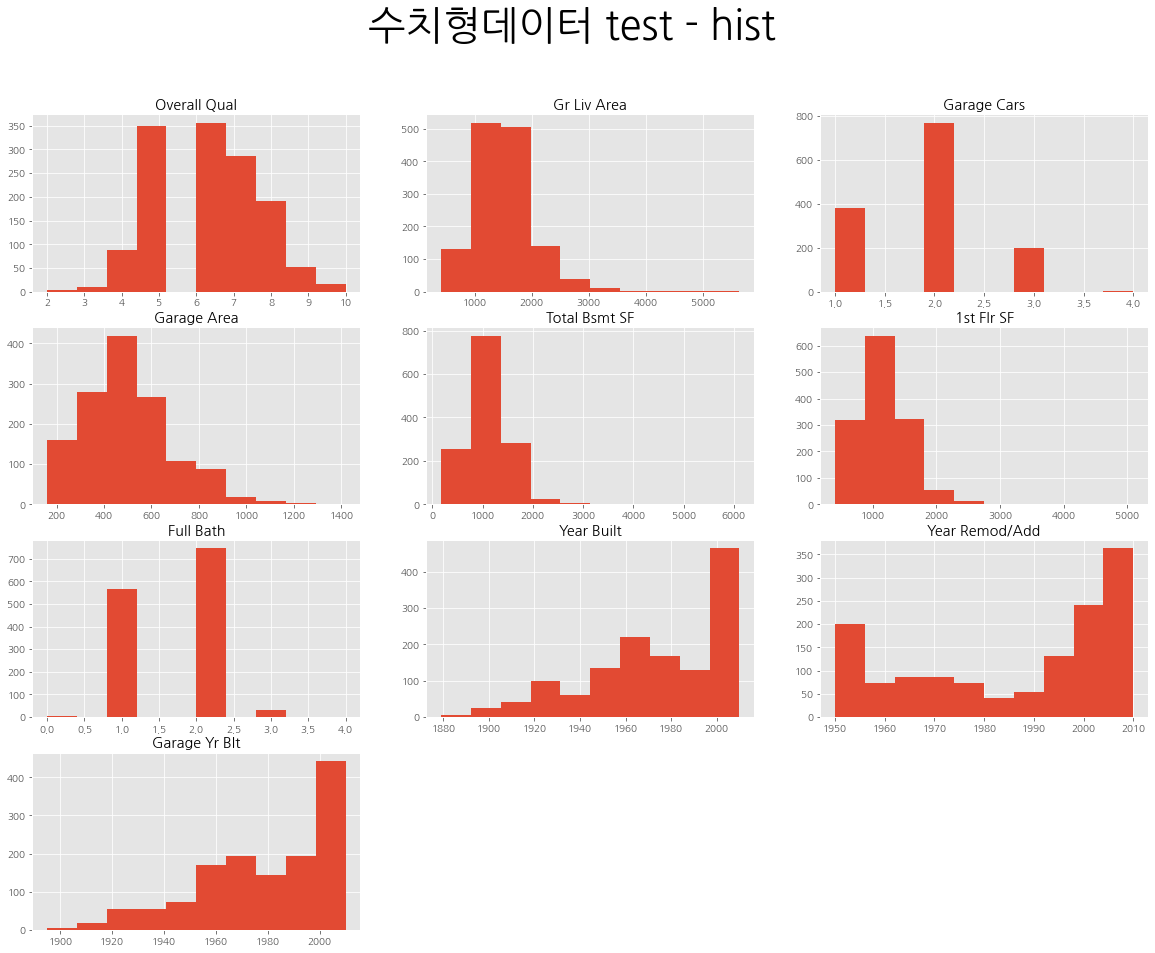

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_features_del_target

# Boxplot을 이용해서 데이터의 분포 살펴보기

plt.figure(figsize = (20,15))
plt.suptitle("수치형데이터 test - hist", fontsize = 40)

for i in range(len(feature)) :
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.hist(test_df[feature[i]])
plt.show()

## 범주형 데이터는 다음과 같음
- Exter Qual, Kitchen Qual, Bsmt Qual은 범주형변수로, Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!



In [17]:
categorical_features

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual'], dtype='object')

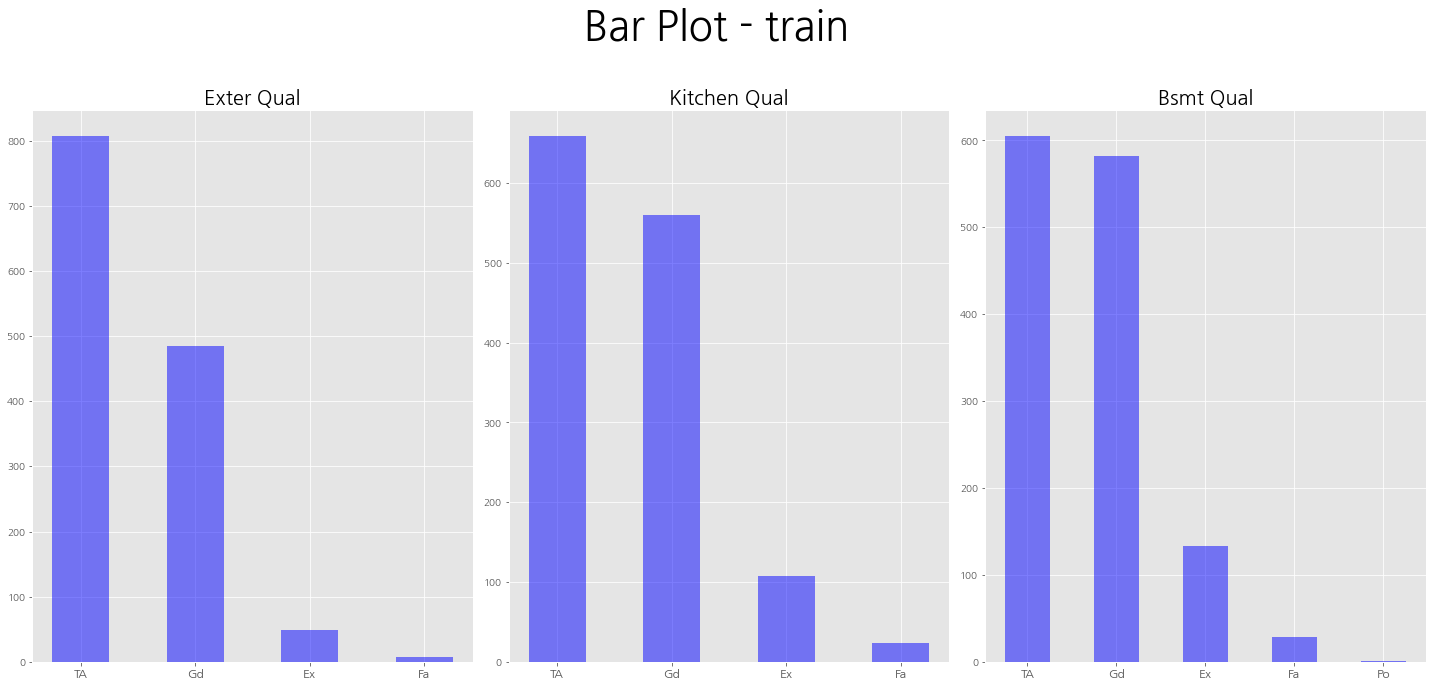

In [18]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

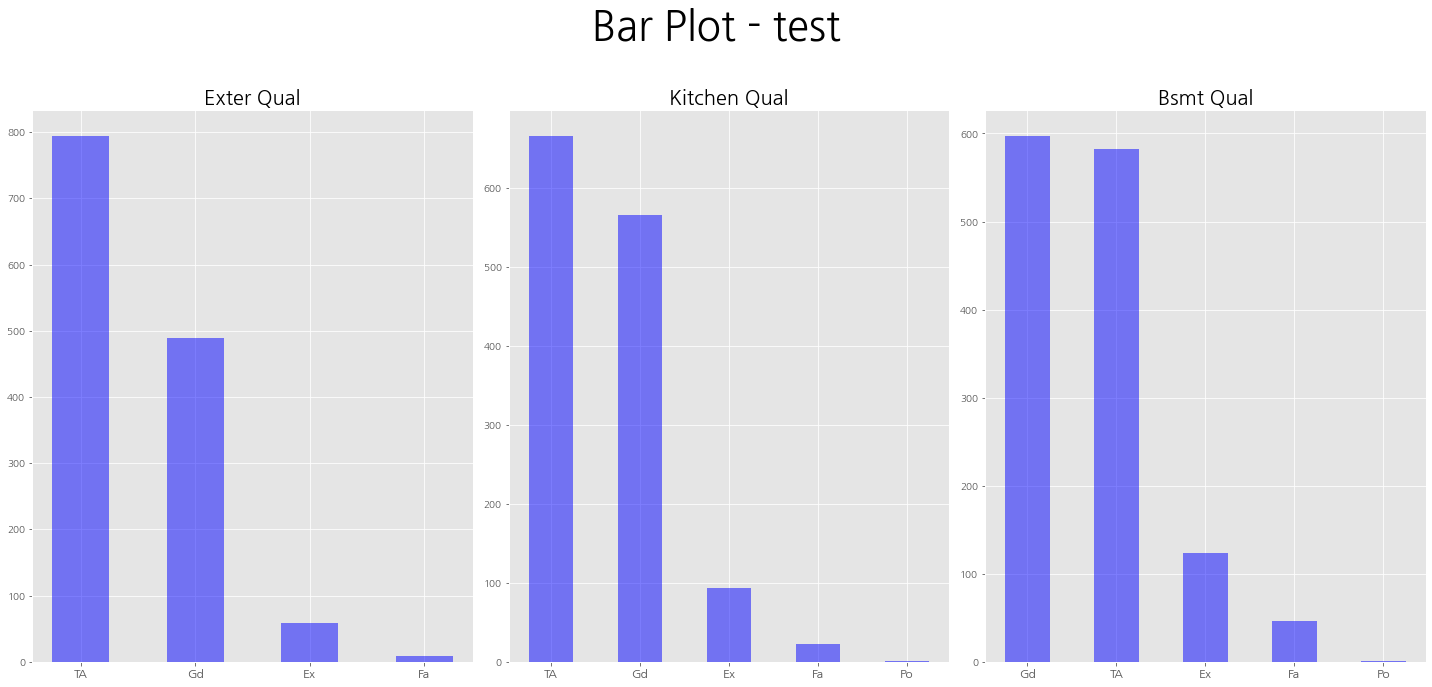

In [19]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 상관관계 시각화

In [20]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

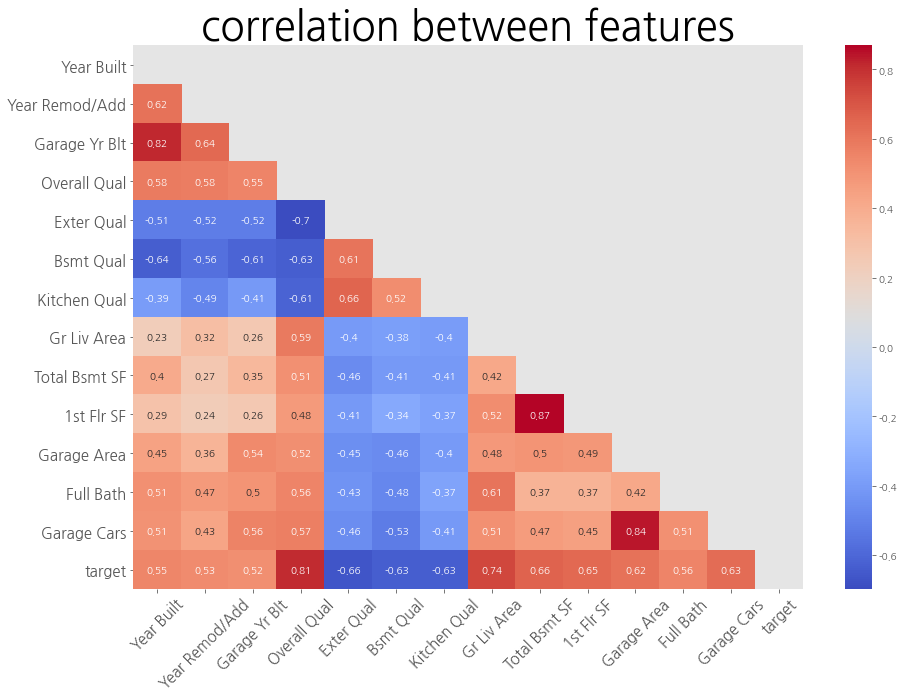

In [21]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

## Target과 다른 feature들과의 관계

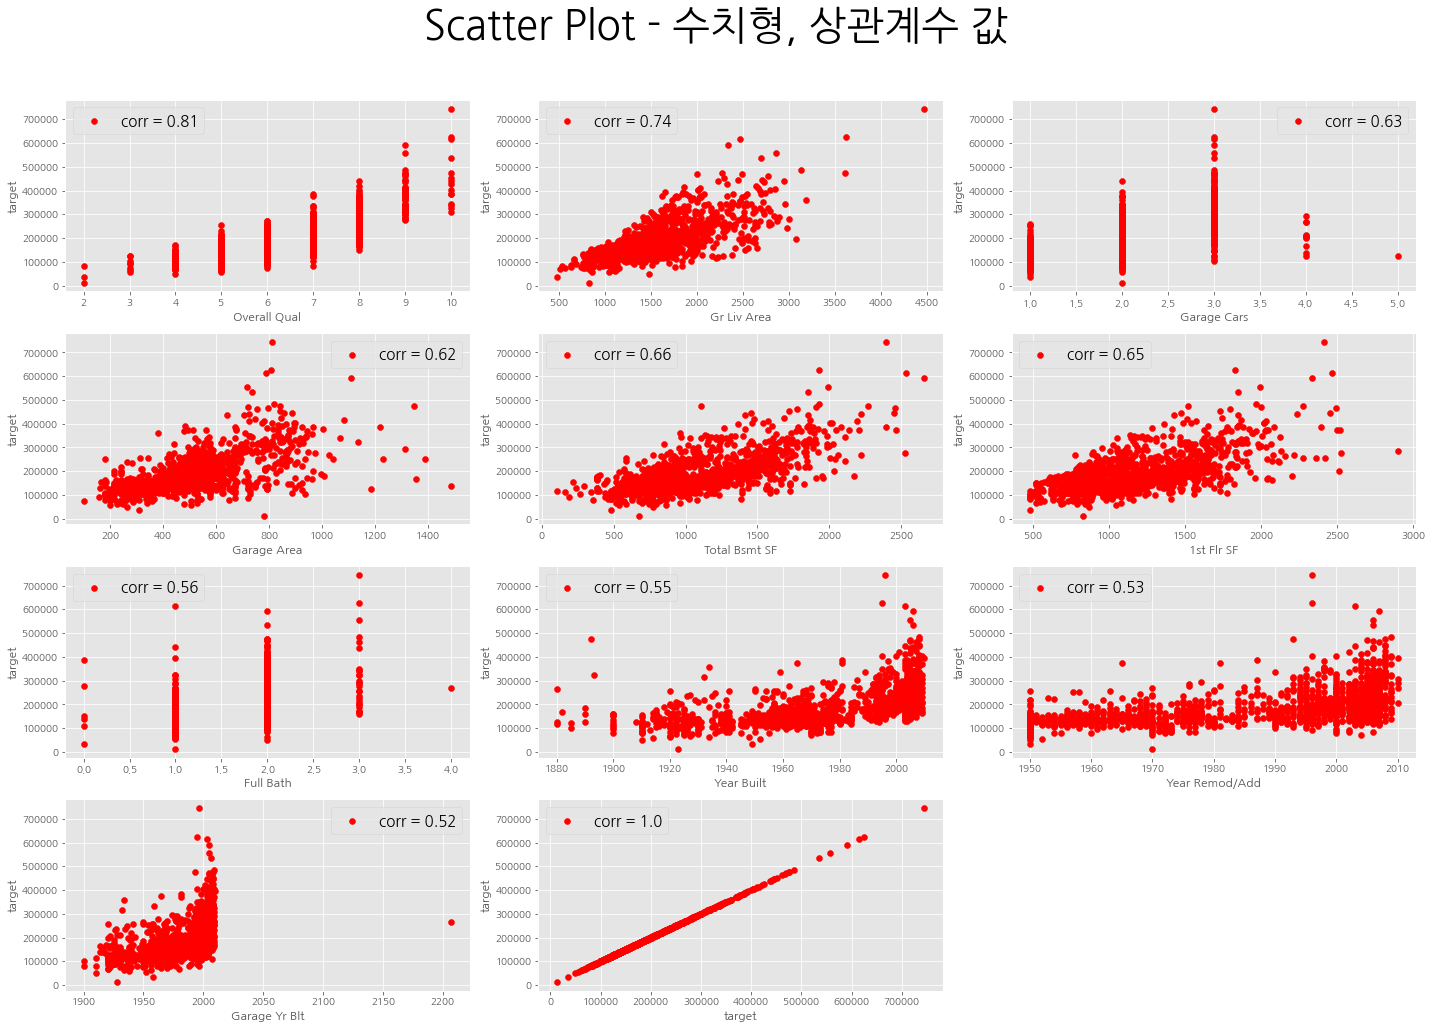

In [22]:
target = "target"

feature = numeric_features

plt.figure(figsize = (20,15))
plt.suptitle("Scatter Plot - 수치형, 상관계수 값",fontsize = 40)

for i in range(len(feature)):
    
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train_df[[feature[i],target]].corr().iloc[0,1].round(2)
    
    c = "red" if corr_score > 0 else "blue"
    
    plt.scatter(train_df[feature[i]], train_df[target], color = c, label = f"corr = {corr_score}")
    plt.legend(fontsize = 15)
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [26]:
# 이상치 개수 구하는 함수 정의

def check_outlier(df,columns):
    
    for column in columns :
        
        q1 = df[column].quantile(.25)
        q3 = df[column].quantile(.75)
        iqr = q3 - q1
        
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        
        outlier_count = len(df.loc[(df[column] < low) | (df[column] > high)])
        
        print(f"{column}의 이상치 개수는 {outlier_count} 개 입니다.")
        
        
    
    

In [27]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df, numeric_features)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 28 개 입니다.
Garage Cars의 이상치 개수는 11 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 19 개 입니다.
1st Flr SF의 이상치 개수는 18 개 입니다.
Full Bath의 이상치 개수는 1 개 입니다.
Year Built의 이상치 개수는 4 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 1 개 입니다.
target의 이상치 개수는 66 개 입니다.


In [28]:
# test 데이터 컬럼별 이상치 개수

check_outlier(test_df,numeric_features_del_target)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 43 개 입니다.
Garage Cars의 이상치 개수는 4 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 22 개 입니다.
1st Flr SF의 이상치 개수는 21 개 입니다.
Full Bath의 이상치 개수는 2 개 입니다.
Year Built의 이상치 개수는 2 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 2 개 입니다.


# EDA 결과

- 결측치는 따로 없음
- 이상치 있는 컬럼들이 꽤 보임. 이들을 어떻게 처리하는지 중요할 듯
    - test에서는 이상치가 확 차이나진 않는 듯
- 수치형 컬럼들이 정규분포를 띄지 않음. 로그로 바꿔주든 표준화하든 해야 할 듯
- 범주형 컬럼들 수치로 어떻게 바구냐에 따라 결과 차이 날 듯

### 일단은 train에서 확 차이나는 이상치 하나 Garage Yr blt만 이상치 처리

In [29]:
train_df.loc[254,"Garage Yr Blt"] = 2007

In [30]:
# train 데이터 컬럼별 이상치 개수

check_outlier(train_df, numeric_features)

Overall Qual의 이상치 개수는 0 개 입니다.
Gr Liv Area의 이상치 개수는 28 개 입니다.
Garage Cars의 이상치 개수는 11 개 입니다.
Garage Area의 이상치 개수는 36 개 입니다.
Total Bsmt SF의 이상치 개수는 19 개 입니다.
1st Flr SF의 이상치 개수는 18 개 입니다.
Full Bath의 이상치 개수는 1 개 입니다.
Year Built의 이상치 개수는 4 개 입니다.
Year Remod/Add의 이상치 개수는 0 개 입니다.
Garage Yr Blt의 이상치 개수는 0 개 입니다.
target의 이상치 개수는 66 개 입니다.


### 범주형 컬럼들 수치로 바꿔주기1

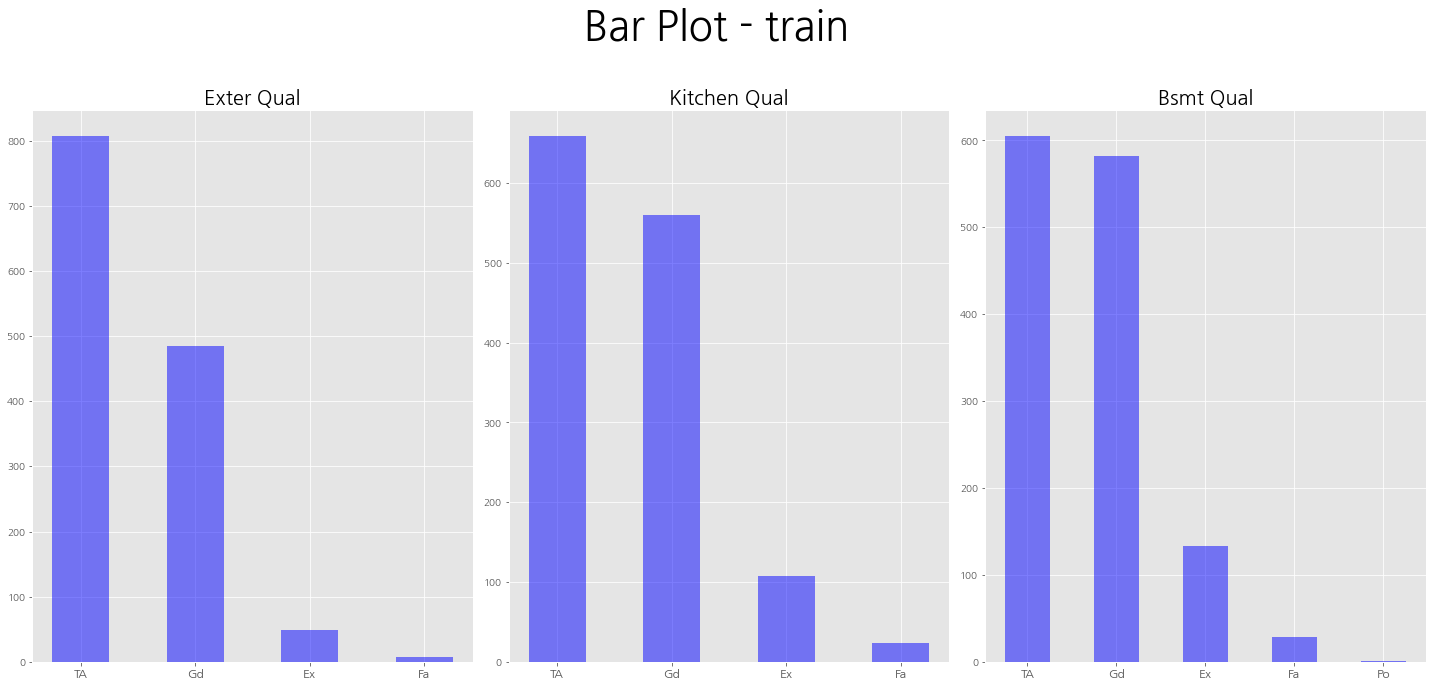

In [31]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - train", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

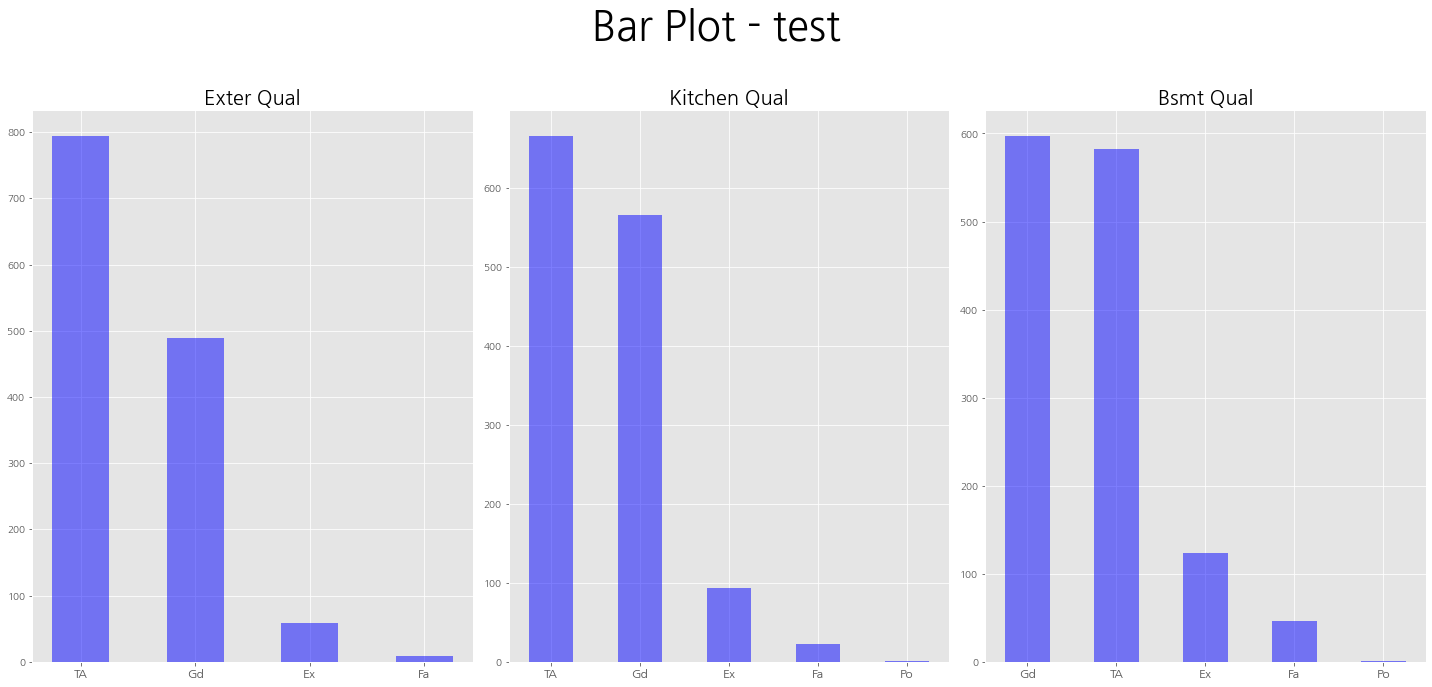

In [32]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_features

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot - test", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = test_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [33]:
# 범주형 컬럼 'Exter Qual encoded' , 'Kitchen Qual encoded' , 'Bsmt Qual encoded'
# Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!

train_pre = train_df.copy()
test_pre = test_df.copy()

In [34]:
# "TA","Gd","Ex","Fa","Po"

Exter_Qual_dict = train_df.groupby(["Exter Qual"])["target"].mean().to_dict()
Kitchen_Qual_dict = train_df.groupby(["Kitchen Qual"])["target"].mean().to_dict()
Bsmt_Qual_dict = train_df.groupby(["Bsmt Qual"])["target"].mean().to_dict()

In [35]:
train_pre["Exter Qual"] = train_pre["Exter Qual"].map(Exter_Qual_dict)
train_pre["Kitchen Qual"] = train_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
train_pre["Bsmt Qual"] = train_pre["Bsmt Qual"].map(Bsmt_Qual_dict)

test_pre["Exter Qual"] = test_pre["Exter Qual"].map(Exter_Qual_dict)
test_pre["Kitchen Qual"] = test_pre["Kitchen Qual"].map(Kitchen_Qual_dict)
test_pre["Bsmt Qual"] = test_pre["Bsmt Qual"].map(Bsmt_Qual_dict)

In [36]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   int64  
 1   Year Remod/Add  1349 non-null   int64  
 2   Garage Yr Blt   1349 non-null   int64  
 3   Overall Qual    1349 non-null   int64  
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   int64  
 12  Garage Cars     1349 non-null   int64  
 13  target          1349 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 190.4 KB


In [37]:
test_pre.fillna(test_pre.mean(),inplace = True)

In [38]:
train_pre.head()

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,369636.122449,330963.872180,330451.149533,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,234161.577320,330963.872180,211360.892857,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,147382.582404,143175.100826,144056.610015,900,864,900,288,1,1,123000
3,1900,2006,2000,5,147382.582404,143175.100826,211360.892857,1174,680,680,576,1,2,135000
4,2005,2005,2005,7,234161.577320,201927.286942,211360.892857,1958,1026,1026,936,2,3,250000


In [40]:
train_df.groupby(["Overall Qual"])["target"].mean().to_dict()

{2: 43366.666666666664,
 3: 92334.375,
 4: 108232.73333333334,
 5: 136439.7810026385,
 6: 163546.35897435897,
 7: 206188.26797385621,
 8: 273767.0961538461,
 9: 369155.8035714286,
 10: 453556.06666666665}

In [41]:
Overall_Qual_list = train_df.groupby(["Overall Qual"])["target"].mean().to_dict()
Full_Bath_dict = train_df.groupby(["Full Bath"])["target"].mean().to_dict()
Garage_Cars_dict = train_df.groupby(["Garage Cars"])["target"].mean().to_dict()


In [42]:
train_pre["Full Bath"] = train_pre["Full Bath"].map(Full_Bath_dict)
train_pre["Garage Cars"] = train_pre["Garage Cars"].map(Garage_Cars_dict)
train_pre["Overall Qual"] = train_pre["Overall Qual"].map(Overall_Qual_list)

test_pre["Full Bath"] = test_pre["Full Bath"].map(Full_Bath_dict)
test_pre["Garage Cars"] = test_pre["Garage Cars"].map(Garage_Cars_dict)
test_pre["Overall Qual"] = test_pre["Overall Qual"].map(Overall_Qual_list)


In [43]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1349 non-null   int64  
 1   Year Remod/Add  1349 non-null   int64  
 2   Garage Yr Blt   1349 non-null   int64  
 3   Overall Qual    1349 non-null   float64
 4   Exter Qual      1349 non-null   float64
 5   Bsmt Qual       1349 non-null   float64
 6   Kitchen Qual    1349 non-null   float64
 7   Gr Liv Area     1349 non-null   int64  
 8   Total Bsmt SF   1349 non-null   int64  
 9   1st Flr SF      1349 non-null   int64  
 10  Garage Area     1349 non-null   int64  
 11  Full Bath       1349 non-null   float64
 12  Garage Cars     1349 non-null   float64
 13  target          1349 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 190.4 KB


In [44]:
test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      1350 non-null   int64  
 1   Year Remod/Add  1350 non-null   int64  
 2   Garage Yr Blt   1350 non-null   int64  
 3   Overall Qual    1350 non-null   float64
 4   Exter Qual      1350 non-null   float64
 5   Bsmt Qual       1350 non-null   float64
 6   Kitchen Qual    1350 non-null   float64
 7   Gr Liv Area     1350 non-null   int64  
 8   Total Bsmt SF   1350 non-null   int64  
 9   1st Flr SF      1350 non-null   int64  
 10  Garage Area     1350 non-null   int64  
 11  Full Bath       1350 non-null   float64
 12  Garage Cars     1350 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 137.2 KB


In [46]:
train_pre = np.log1p(train_pre)
test_pre = np.log1p(test_pre)


In [47]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train_pre.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [48]:
# #상관관계 분석도 - 로그 변환 전
# plt.figure(figsize=(15,10))

# heat_table = corr_df.corr()
# mask = np.zeros_like(heat_table)
# mask[np.triu_indices_from(mask)] = True
# heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
# heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
# heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
# plt.title('correlation between features', fontsize=40)
# plt.show()

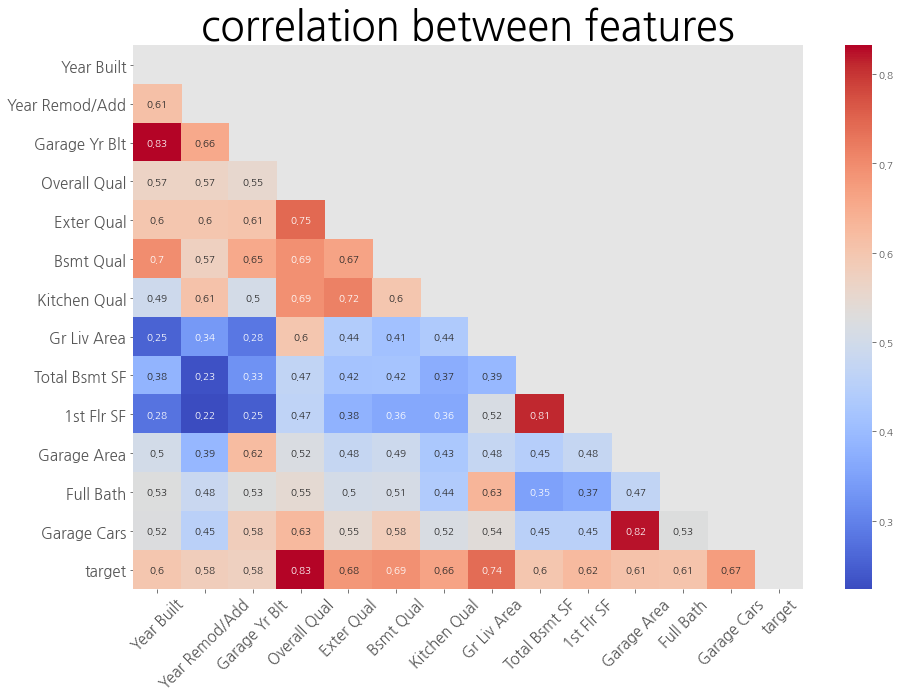

In [49]:
#상관관계 분석도 - 로그 변환 후 
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

In [50]:
train_pre.corr()["target"].sort_values(ascending=False)

target            1.000000
Overall Qual      0.832208
Gr Liv Area       0.740647
Bsmt Qual         0.692802
Exter Qual        0.683882
Garage Cars       0.674463
Kitchen Qual      0.664929
1st Flr SF        0.623795
Garage Area       0.608130
Full Bath         0.605984
Total Bsmt SF     0.601016
Year Built        0.600661
Year Remod/Add    0.580732
Garage Yr Blt     0.575141
Name: target, dtype: float64

In [51]:
# 새로운 컬럼 추가해보기

train_pre_new = train_pre.copy()
train_pre_new['Year Gap Remod'] = train_pre_new['Year Remod/Add'] - train_pre_new['Year Built']
train_pre_new['Car Area'] = train_pre_new['Garage Area']/train_pre_new['Garage Cars']
train_pre_new['2nd flr SF'] = train_pre_new['Gr Liv Area'] - train_pre_new['1st Flr SF']
train_pre_new['2nd flr'] = train_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
train_pre_new['Total SF'] = train_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
train_pre_new['Sum Qual'] = train_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
train_pre_new['Garage InOut'] = train_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

test_pre_new = test_pre.copy()
test_pre_new['Year Gap Remod'] = test_pre_new['Year Remod/Add'] - test_pre_new['Year Built']
test_pre_new['Car Area'] = test_pre_new['Garage Area']/test_pre_new['Garage Cars']
test_pre_new['2nd flr SF'] = test_pre_new['Gr Liv Area'] - test_pre_new['1st Flr SF']
test_pre_new['2nd flr'] = test_pre_new['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)
test_pre_new['Total SF'] = test_pre_new[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
test_pre_new['Sum Qual'] = test_pre_new[["Exter Qual", "Kitchen Qual", "Overall Qual"]].sum(axis=1)
test_pre_new['Garage InOut'] = test_pre_new.apply(lambda x : 1 if x['Gr Liv Area'] != x['1st Flr SF'] else 0, axis=1)

In [98]:
train_pre_new

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,...,Full Bath,Garage Cars,target,Year Gap Remod,Car Area,2nd flr SF,2nd flr,Total SF,Sum Qual,Garage InOut
0,7.602900,7.602900,7.602900,13.024876,12.820277,12.709768,12.708217,7.780303,7.780303,7.780303,...,12.308374,12.659551,12.864243,0.000000,0.543168,0.000000,0,22.436871,38.553371,0
1,7.604396,7.604894,7.604396,12.236550,12.363771,12.709768,12.261327,7.210080,7.210080,7.210080,...,12.308374,12.128708,12.175619,0.000498,0.506759,0.000000,0,20.566489,36.861648,0
2,7.584773,7.584773,7.584773,11.823646,11.900794,11.871831,11.877969,6.803505,6.762730,6.803505,...,11.849138,11.768855,11.719948,0.000000,0.481476,0.000000,0,19.232661,35.602408,0
3,7.550135,7.604396,7.601402,11.823646,11.900794,11.871831,12.261327,7.069023,6.523562,6.523562,...,11.849138,12.128708,11.813037,0.054261,0.524198,0.545461,1,19.950428,35.985767,1
4,7.603898,7.603898,7.603898,12.236550,12.363771,12.215668,12.261327,7.580189,6.934397,6.934397,...,12.308374,12.659551,12.429220,0.000000,0.540515,0.645792,1,21.357270,36.861648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,7.599401,7.599902,7.599401,12.004858,12.363771,12.709768,11.877969,7.471363,6.771936,6.790097,...,12.308374,12.128708,12.225880,0.000501,0.498600,0.681266,1,20.290671,36.246597,1
1346,7.604396,7.604396,7.604396,12.818977,12.363771,12.709768,12.708217,7.918992,7.523481,7.523481,...,12.308374,12.659551,12.873905,0.000000,0.532911,0.395511,1,22.188886,37.890965,1
1347,7.584773,7.584773,7.584773,11.823646,11.900794,11.871831,11.877969,7.102499,7.102499,7.102499,...,12.308374,11.768855,11.870607,0.000000,0.489868,0.000000,0,19.970190,35.602408,0
1348,7.588324,7.588324,7.588324,11.823646,11.900794,12.215668,11.877969,6.796824,6.762730,6.796824,...,11.849138,12.128708,11.782960,0.000000,0.502036,0.000000,0,19.648598,35.602408,0


In [52]:
train_pre_new.shape

(1349, 21)

In [53]:
test_pre_new.shape

(1350, 20)

In [54]:
train_df

,Year Built,Year Remod/Add,Garage Yr Blt,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Garage Area,Full Bath,Garage Cars,target
0,2003,2003,2003,10,Ex,Ex,Ex,2392,2392,2392,968,2,3,386250
1,2006,2007,2006,7,Gd,Ex,Gd,1352,1352,1352,466,2,2,194000
2,1967,1967,1967,5,TA,TA,TA,900,864,900,288,1,1,123000
3,1900,2006,2000,5,TA,TA,Gd,1174,680,680,576,1,2,135000
4,2005,2005,2005,7,Gd,Gd,Gd,1958,1026,1026,936,2,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1996,1997,1996,6,Gd,Ex,TA,1756,872,888,422,2,2,204000
1346,2006,2006,2006,9,Gd,Ex,Ex,2748,1850,1850,850,2,3,390000
1347,1967,1967,1967,5,TA,TA,TA,1214,1214,1214,318,2,1,143000
1348,1974,1974,1974,5,TA,Gd,TA,894,864,894,440,1,2,131000


In [55]:
# train_pre_drop = train_pre.copy()
# train_pre_drop = train_pre_drop.drop(columns=["Year Built","Year Remod/Add","Garage Yr Blt"])

# test_pre_drop = test_pre.copy()
# test_pre_drop = test_pre_drop.drop(columns=["Year Built","Year Remod/Add","Garage Yr Blt"])

# 모델링

In [56]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression # 릿지, 라쏘, 선형회귀
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.tree import DecisionTreeRegressor #의사결정회귀
from xgboost import XGBRegressor #XGB회귀
from lightgbm import LGBMRegressor #LGB회귀
from ngboost import NGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import train_test_split

In [57]:
ridge = Ridge()
lasso = Lasso()
linear = LinearRegression()
cat_reg = CatBoostRegressor()
ngb_reg = NGBRegressor()
gb_reg = GradientBoostingRegressor()
rf_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [58]:
# X_data = train_pre.drop(columns=["target"], axis = 1)
# y_target = train_pre["target"]

In [92]:
X_data = train_pre_new.drop(columns=["target"], axis = 1)
y_target = train_pre_new["target"]

In [93]:
def get_avg_NAME_cv(models):
    
    for model in models:
        
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행
        mae_avg = np.mean(-cross_val_score(model, X_data, y_target, scoring = "neg_mean_absolute_error", cv = 5 ))
        NMAE_avg = mae_avg / np.mean(np.abs(y_target))
        
        print("\n{0} CV 평균 NMAE 값 : {1}".format(model.__class__.__name__, np.round(NMAE_avg,3)))
        
        #return NMAE_avg

In [94]:
models = [ridge, lasso, linear, cat_reg, ngb_reg, gb_reg, rf_reg, dt_reg, xgb_reg, lgbm_reg]

get_avg_NAME_cv(models)


Ridge CV 평균 NMAE 값 : 0.009

Lasso CV 평균 NMAE 값 : 0.025

LinearRegression CV 평균 NMAE 값 : 0.009
Learning rate set to 0.041438
0:	learn: 0.3757203	total: 1.97ms	remaining: 1.97s
1:	learn: 0.3656812	total: 3.69ms	remaining: 1.84s
2:	learn: 0.3560686	total: 5.2ms	remaining: 1.73s
3:	learn: 0.3468849	total: 6.86ms	remaining: 1.71s
4:	learn: 0.3381201	total: 8.52ms	remaining: 1.69s
5:	learn: 0.3291231	total: 10.2ms	remaining: 1.68s
6:	learn: 0.3210775	total: 11.8ms	remaining: 1.68s
7:	learn: 0.3136115	total: 13.5ms	remaining: 1.68s
8:	learn: 0.3059485	total: 15.1ms	remaining: 1.66s
9:	learn: 0.2988607	total: 16.8ms	remaining: 1.66s
10:	learn: 0.2918161	total: 18.4ms	remaining: 1.65s
11:	learn: 0.2850378	total: 20ms	remaining: 1.64s
12:	learn: 0.2787787	total: 21.6ms	remaining: 1.64s
13:	learn: 0.2725006	total: 23.3ms	remaining: 1.64s
14:	learn: 0.2669727	total: 24.9ms	remaining: 1.63s
15:	learn: 0.2614892	total: 26.4ms	remaining: 1.62s
16:	learn: 0.2559877	total: 27.8ms	remaining: 1.61s
17:	

194:	learn: 0.1089968	total: 303ms	remaining: 1.25s
195:	learn: 0.1089075	total: 305ms	remaining: 1.25s
196:	learn: 0.1087118	total: 307ms	remaining: 1.25s
197:	learn: 0.1085968	total: 308ms	remaining: 1.25s
198:	learn: 0.1084076	total: 310ms	remaining: 1.25s
199:	learn: 0.1082960	total: 312ms	remaining: 1.25s
200:	learn: 0.1082129	total: 314ms	remaining: 1.25s
201:	learn: 0.1080926	total: 315ms	remaining: 1.25s
202:	learn: 0.1078275	total: 317ms	remaining: 1.25s
203:	learn: 0.1077454	total: 319ms	remaining: 1.24s
204:	learn: 0.1075796	total: 321ms	remaining: 1.24s
205:	learn: 0.1074343	total: 322ms	remaining: 1.24s
206:	learn: 0.1073065	total: 324ms	remaining: 1.24s
207:	learn: 0.1071785	total: 326ms	remaining: 1.24s
208:	learn: 0.1070211	total: 327ms	remaining: 1.24s
209:	learn: 0.1069018	total: 329ms	remaining: 1.24s
210:	learn: 0.1068218	total: 330ms	remaining: 1.23s
211:	learn: 0.1067198	total: 331ms	remaining: 1.23s
212:	learn: 0.1065710	total: 333ms	remaining: 1.23s
213:	learn: 

433:	learn: 0.0885506	total: 654ms	remaining: 853ms
434:	learn: 0.0885266	total: 656ms	remaining: 852ms
435:	learn: 0.0884268	total: 657ms	remaining: 850ms
436:	learn: 0.0883162	total: 659ms	remaining: 849ms
437:	learn: 0.0882568	total: 660ms	remaining: 847ms
438:	learn: 0.0881472	total: 661ms	remaining: 845ms
439:	learn: 0.0881379	total: 662ms	remaining: 843ms
440:	learn: 0.0880730	total: 664ms	remaining: 841ms
441:	learn: 0.0880686	total: 665ms	remaining: 840ms
442:	learn: 0.0879935	total: 667ms	remaining: 838ms
443:	learn: 0.0878658	total: 668ms	remaining: 837ms
444:	learn: 0.0878582	total: 670ms	remaining: 836ms
445:	learn: 0.0878359	total: 672ms	remaining: 834ms
446:	learn: 0.0877935	total: 673ms	remaining: 833ms
447:	learn: 0.0876867	total: 675ms	remaining: 832ms
448:	learn: 0.0875915	total: 677ms	remaining: 831ms
449:	learn: 0.0875355	total: 678ms	remaining: 829ms
450:	learn: 0.0874353	total: 680ms	remaining: 827ms
451:	learn: 0.0873240	total: 681ms	remaining: 826ms
452:	learn: 

665:	learn: 0.0730573	total: 1s	remaining: 504ms
666:	learn: 0.0729628	total: 1.01s	remaining: 503ms
667:	learn: 0.0728836	total: 1.01s	remaining: 501ms
668:	learn: 0.0727705	total: 1.01s	remaining: 500ms
669:	learn: 0.0726942	total: 1.01s	remaining: 499ms
670:	learn: 0.0726540	total: 1.01s	remaining: 497ms
671:	learn: 0.0725571	total: 1.01s	remaining: 496ms
672:	learn: 0.0725044	total: 1.02s	remaining: 494ms
673:	learn: 0.0724355	total: 1.02s	remaining: 493ms
674:	learn: 0.0723828	total: 1.02s	remaining: 491ms
675:	learn: 0.0723552	total: 1.02s	remaining: 490ms
676:	learn: 0.0722925	total: 1.02s	remaining: 488ms
677:	learn: 0.0722383	total: 1.02s	remaining: 487ms
678:	learn: 0.0721786	total: 1.03s	remaining: 485ms
679:	learn: 0.0721293	total: 1.03s	remaining: 484ms
680:	learn: 0.0721045	total: 1.03s	remaining: 482ms
681:	learn: 0.0721020	total: 1.03s	remaining: 481ms
682:	learn: 0.0720261	total: 1.03s	remaining: 479ms
683:	learn: 0.0719473	total: 1.03s	remaining: 478ms
684:	learn: 0.0

903:	learn: 0.0609882	total: 1.37s	remaining: 146ms
904:	learn: 0.0609442	total: 1.37s	remaining: 144ms
905:	learn: 0.0608772	total: 1.37s	remaining: 143ms
906:	learn: 0.0608264	total: 1.38s	remaining: 141ms
907:	learn: 0.0607933	total: 1.38s	remaining: 140ms
908:	learn: 0.0607394	total: 1.38s	remaining: 138ms
909:	learn: 0.0606821	total: 1.38s	remaining: 136ms
910:	learn: 0.0606298	total: 1.38s	remaining: 135ms
911:	learn: 0.0606162	total: 1.38s	remaining: 133ms
912:	learn: 0.0605964	total: 1.38s	remaining: 132ms
913:	learn: 0.0605627	total: 1.39s	remaining: 130ms
914:	learn: 0.0605402	total: 1.39s	remaining: 129ms
915:	learn: 0.0605076	total: 1.39s	remaining: 127ms
916:	learn: 0.0604457	total: 1.39s	remaining: 126ms
917:	learn: 0.0603959	total: 1.39s	remaining: 124ms
918:	learn: 0.0603774	total: 1.39s	remaining: 123ms
919:	learn: 0.0603719	total: 1.4s	remaining: 121ms
920:	learn: 0.0603250	total: 1.4s	remaining: 120ms
921:	learn: 0.0602943	total: 1.4s	remaining: 118ms
922:	learn: 0.0

118:	learn: 0.1239818	total: 195ms	remaining: 1.44s
119:	learn: 0.1238714	total: 196ms	remaining: 1.44s
120:	learn: 0.1238056	total: 197ms	remaining: 1.43s
121:	learn: 0.1236095	total: 198ms	remaining: 1.43s
122:	learn: 0.1233559	total: 200ms	remaining: 1.42s
123:	learn: 0.1231852	total: 201ms	remaining: 1.42s
124:	learn: 0.1229180	total: 203ms	remaining: 1.42s
125:	learn: 0.1226969	total: 205ms	remaining: 1.42s
126:	learn: 0.1226133	total: 206ms	remaining: 1.42s
127:	learn: 0.1222953	total: 208ms	remaining: 1.42s
128:	learn: 0.1220881	total: 210ms	remaining: 1.42s
129:	learn: 0.1218157	total: 212ms	remaining: 1.42s
130:	learn: 0.1215636	total: 213ms	remaining: 1.42s
131:	learn: 0.1213832	total: 215ms	remaining: 1.41s
132:	learn: 0.1212298	total: 216ms	remaining: 1.41s
133:	learn: 0.1210165	total: 218ms	remaining: 1.41s
134:	learn: 0.1208737	total: 219ms	remaining: 1.4s
135:	learn: 0.1208132	total: 220ms	remaining: 1.4s
136:	learn: 0.1207064	total: 221ms	remaining: 1.4s
137:	learn: 0.1

368:	learn: 0.0920317	total: 547ms	remaining: 936ms
369:	learn: 0.0918781	total: 549ms	remaining: 935ms
370:	learn: 0.0918098	total: 551ms	remaining: 934ms
371:	learn: 0.0917390	total: 552ms	remaining: 932ms
372:	learn: 0.0916378	total: 553ms	remaining: 930ms
373:	learn: 0.0915790	total: 555ms	remaining: 929ms
374:	learn: 0.0914291	total: 556ms	remaining: 927ms
375:	learn: 0.0912540	total: 558ms	remaining: 925ms
376:	learn: 0.0911453	total: 559ms	remaining: 924ms
377:	learn: 0.0910269	total: 561ms	remaining: 923ms
378:	learn: 0.0909810	total: 563ms	remaining: 922ms
379:	learn: 0.0909373	total: 564ms	remaining: 920ms
380:	learn: 0.0908489	total: 566ms	remaining: 919ms
381:	learn: 0.0907434	total: 568ms	remaining: 918ms
382:	learn: 0.0906672	total: 569ms	remaining: 917ms
383:	learn: 0.0906002	total: 571ms	remaining: 916ms
384:	learn: 0.0904498	total: 573ms	remaining: 915ms
385:	learn: 0.0903581	total: 575ms	remaining: 914ms
386:	learn: 0.0902886	total: 576ms	remaining: 913ms
387:	learn: 

596:	learn: 0.0738726	total: 897ms	remaining: 606ms
597:	learn: 0.0737883	total: 899ms	remaining: 604ms
598:	learn: 0.0737620	total: 901ms	remaining: 603ms
599:	learn: 0.0736778	total: 902ms	remaining: 602ms
600:	learn: 0.0736551	total: 904ms	remaining: 600ms
601:	learn: 0.0736392	total: 906ms	remaining: 599ms
602:	learn: 0.0735649	total: 908ms	remaining: 598ms
603:	learn: 0.0734940	total: 909ms	remaining: 596ms
604:	learn: 0.0734380	total: 911ms	remaining: 595ms
605:	learn: 0.0734073	total: 912ms	remaining: 593ms
606:	learn: 0.0733352	total: 914ms	remaining: 592ms
607:	learn: 0.0732592	total: 915ms	remaining: 590ms
608:	learn: 0.0731837	total: 917ms	remaining: 588ms
609:	learn: 0.0730963	total: 918ms	remaining: 587ms
610:	learn: 0.0730403	total: 920ms	remaining: 586ms
611:	learn: 0.0730037	total: 921ms	remaining: 584ms
612:	learn: 0.0729405	total: 923ms	remaining: 583ms
613:	learn: 0.0728724	total: 924ms	remaining: 581ms
614:	learn: 0.0727830	total: 925ms	remaining: 579ms
615:	learn: 

835:	learn: 0.0606043	total: 1.25s	remaining: 245ms
836:	learn: 0.0605916	total: 1.25s	remaining: 244ms
837:	learn: 0.0605460	total: 1.25s	remaining: 242ms
838:	learn: 0.0604853	total: 1.25s	remaining: 241ms
839:	learn: 0.0604339	total: 1.25s	remaining: 239ms
840:	learn: 0.0603712	total: 1.26s	remaining: 238ms
841:	learn: 0.0603528	total: 1.26s	remaining: 236ms
842:	learn: 0.0603185	total: 1.26s	remaining: 235ms
843:	learn: 0.0602862	total: 1.26s	remaining: 233ms
844:	learn: 0.0602339	total: 1.26s	remaining: 232ms
845:	learn: 0.0602108	total: 1.26s	remaining: 230ms
846:	learn: 0.0601244	total: 1.27s	remaining: 229ms
847:	learn: 0.0600979	total: 1.27s	remaining: 227ms
848:	learn: 0.0600740	total: 1.27s	remaining: 226ms
849:	learn: 0.0600071	total: 1.27s	remaining: 224ms
850:	learn: 0.0599840	total: 1.27s	remaining: 223ms
851:	learn: 0.0598828	total: 1.27s	remaining: 221ms
852:	learn: 0.0598351	total: 1.27s	remaining: 220ms
853:	learn: 0.0598141	total: 1.28s	remaining: 218ms
854:	learn: 

42:	learn: 0.1714055	total: 74.7ms	remaining: 1.66s
43:	learn: 0.1697108	total: 76.5ms	remaining: 1.66s
44:	learn: 0.1681291	total: 78.1ms	remaining: 1.66s
45:	learn: 0.1665804	total: 80ms	remaining: 1.66s
46:	learn: 0.1649734	total: 82ms	remaining: 1.66s
47:	learn: 0.1635401	total: 83.9ms	remaining: 1.66s
48:	learn: 0.1620839	total: 85.6ms	remaining: 1.66s
49:	learn: 0.1604771	total: 87.4ms	remaining: 1.66s
50:	learn: 0.1590772	total: 89ms	remaining: 1.66s
51:	learn: 0.1577646	total: 90.6ms	remaining: 1.65s
52:	learn: 0.1564900	total: 92.1ms	remaining: 1.65s
53:	learn: 0.1553415	total: 93.7ms	remaining: 1.64s
54:	learn: 0.1542823	total: 95.7ms	remaining: 1.64s
55:	learn: 0.1531521	total: 97.6ms	remaining: 1.65s
56:	learn: 0.1520372	total: 99.1ms	remaining: 1.64s
57:	learn: 0.1510753	total: 100ms	remaining: 1.63s
58:	learn: 0.1501800	total: 102ms	remaining: 1.62s
59:	learn: 0.1492030	total: 103ms	remaining: 1.62s
60:	learn: 0.1483804	total: 105ms	remaining: 1.61s
61:	learn: 0.1474279	t

261:	learn: 0.0995600	total: 423ms	remaining: 1.19s
262:	learn: 0.0995005	total: 425ms	remaining: 1.19s
263:	learn: 0.0994285	total: 427ms	remaining: 1.19s
264:	learn: 0.0993990	total: 429ms	remaining: 1.19s
265:	learn: 0.0993270	total: 431ms	remaining: 1.19s
266:	learn: 0.0992809	total: 433ms	remaining: 1.19s
267:	learn: 0.0992217	total: 434ms	remaining: 1.19s
268:	learn: 0.0991581	total: 437ms	remaining: 1.19s
269:	learn: 0.0990927	total: 439ms	remaining: 1.19s
270:	learn: 0.0989795	total: 441ms	remaining: 1.19s
271:	learn: 0.0988024	total: 442ms	remaining: 1.18s
272:	learn: 0.0987271	total: 444ms	remaining: 1.18s
273:	learn: 0.0985758	total: 446ms	remaining: 1.18s
274:	learn: 0.0985188	total: 448ms	remaining: 1.18s
275:	learn: 0.0984458	total: 449ms	remaining: 1.18s
276:	learn: 0.0983155	total: 451ms	remaining: 1.18s
277:	learn: 0.0982734	total: 453ms	remaining: 1.18s
278:	learn: 0.0981612	total: 455ms	remaining: 1.18s
279:	learn: 0.0980715	total: 457ms	remaining: 1.18s
280:	learn: 

493:	learn: 0.0798781	total: 775ms	remaining: 794ms
494:	learn: 0.0798380	total: 777ms	remaining: 792ms
495:	learn: 0.0797275	total: 778ms	remaining: 791ms
496:	learn: 0.0797187	total: 780ms	remaining: 789ms
497:	learn: 0.0796974	total: 781ms	remaining: 787ms
498:	learn: 0.0796648	total: 783ms	remaining: 786ms
499:	learn: 0.0796518	total: 784ms	remaining: 784ms
500:	learn: 0.0795449	total: 786ms	remaining: 783ms
501:	learn: 0.0795250	total: 788ms	remaining: 781ms
502:	learn: 0.0795182	total: 789ms	remaining: 780ms
503:	learn: 0.0793829	total: 790ms	remaining: 778ms
504:	learn: 0.0793765	total: 792ms	remaining: 776ms
505:	learn: 0.0793676	total: 793ms	remaining: 774ms
506:	learn: 0.0792734	total: 795ms	remaining: 773ms
507:	learn: 0.0792093	total: 797ms	remaining: 771ms
508:	learn: 0.0791050	total: 798ms	remaining: 770ms
509:	learn: 0.0790081	total: 799ms	remaining: 768ms
510:	learn: 0.0789272	total: 801ms	remaining: 766ms
511:	learn: 0.0789128	total: 802ms	remaining: 765ms
512:	learn: 

725:	learn: 0.0673475	total: 1.12s	remaining: 424ms
726:	learn: 0.0672859	total: 1.13s	remaining: 423ms
727:	learn: 0.0672584	total: 1.13s	remaining: 421ms
728:	learn: 0.0671939	total: 1.13s	remaining: 420ms
729:	learn: 0.0671357	total: 1.13s	remaining: 418ms
730:	learn: 0.0670343	total: 1.13s	remaining: 417ms
731:	learn: 0.0669581	total: 1.13s	remaining: 415ms
732:	learn: 0.0669440	total: 1.14s	remaining: 413ms
733:	learn: 0.0668846	total: 1.14s	remaining: 412ms
734:	learn: 0.0668226	total: 1.14s	remaining: 410ms
735:	learn: 0.0667424	total: 1.14s	remaining: 409ms
736:	learn: 0.0667210	total: 1.14s	remaining: 407ms
737:	learn: 0.0666515	total: 1.14s	remaining: 406ms
738:	learn: 0.0665832	total: 1.15s	remaining: 404ms
739:	learn: 0.0664767	total: 1.15s	remaining: 403ms
740:	learn: 0.0664322	total: 1.15s	remaining: 401ms
741:	learn: 0.0663727	total: 1.15s	remaining: 400ms
742:	learn: 0.0663519	total: 1.15s	remaining: 398ms
743:	learn: 0.0663356	total: 1.15s	remaining: 397ms
744:	learn: 

950:	learn: 0.0564882	total: 1.48s	remaining: 76.1ms
951:	learn: 0.0564586	total: 1.48s	remaining: 74.6ms
952:	learn: 0.0564170	total: 1.48s	remaining: 73ms
953:	learn: 0.0563621	total: 1.48s	remaining: 71.4ms
954:	learn: 0.0562749	total: 1.48s	remaining: 69.9ms
955:	learn: 0.0562402	total: 1.49s	remaining: 68.4ms
956:	learn: 0.0561686	total: 1.49s	remaining: 66.8ms
957:	learn: 0.0561326	total: 1.49s	remaining: 65.3ms
958:	learn: 0.0560787	total: 1.49s	remaining: 63.7ms
959:	learn: 0.0560355	total: 1.49s	remaining: 62.2ms
960:	learn: 0.0559850	total: 1.49s	remaining: 60.6ms
961:	learn: 0.0559531	total: 1.5s	remaining: 59.1ms
962:	learn: 0.0558845	total: 1.5s	remaining: 57.6ms
963:	learn: 0.0558410	total: 1.5s	remaining: 56ms
964:	learn: 0.0557731	total: 1.5s	remaining: 54.5ms
965:	learn: 0.0557453	total: 1.5s	remaining: 52.9ms
966:	learn: 0.0557189	total: 1.5s	remaining: 51.4ms
967:	learn: 0.0556891	total: 1.51s	remaining: 49.8ms
968:	learn: 0.0556434	total: 1.51s	remaining: 48.3ms
969

154:	learn: 0.1138178	total: 233ms	remaining: 1.27s
155:	learn: 0.1136911	total: 234ms	remaining: 1.27s
156:	learn: 0.1135538	total: 236ms	remaining: 1.27s
157:	learn: 0.1133395	total: 237ms	remaining: 1.26s
158:	learn: 0.1131852	total: 239ms	remaining: 1.26s
159:	learn: 0.1130583	total: 240ms	remaining: 1.26s
160:	learn: 0.1129715	total: 241ms	remaining: 1.26s
161:	learn: 0.1128789	total: 243ms	remaining: 1.25s
162:	learn: 0.1128390	total: 244ms	remaining: 1.25s
163:	learn: 0.1127094	total: 246ms	remaining: 1.26s
164:	learn: 0.1124766	total: 248ms	remaining: 1.26s
165:	learn: 0.1123087	total: 250ms	remaining: 1.25s
166:	learn: 0.1120657	total: 252ms	remaining: 1.25s
167:	learn: 0.1118849	total: 253ms	remaining: 1.25s
168:	learn: 0.1117332	total: 255ms	remaining: 1.25s
169:	learn: 0.1115914	total: 257ms	remaining: 1.25s
170:	learn: 0.1113988	total: 258ms	remaining: 1.25s
171:	learn: 0.1111928	total: 260ms	remaining: 1.25s
172:	learn: 0.1109540	total: 262ms	remaining: 1.25s
173:	learn: 

390:	learn: 0.0877727	total: 583ms	remaining: 909ms
391:	learn: 0.0876474	total: 585ms	remaining: 908ms
392:	learn: 0.0875871	total: 587ms	remaining: 906ms
393:	learn: 0.0875550	total: 589ms	remaining: 905ms
394:	learn: 0.0875034	total: 591ms	remaining: 905ms
395:	learn: 0.0874010	total: 592ms	remaining: 903ms
396:	learn: 0.0873268	total: 594ms	remaining: 902ms
397:	learn: 0.0872465	total: 596ms	remaining: 901ms
398:	learn: 0.0871902	total: 597ms	remaining: 900ms
399:	learn: 0.0871641	total: 599ms	remaining: 899ms
400:	learn: 0.0871037	total: 601ms	remaining: 897ms
401:	learn: 0.0870341	total: 602ms	remaining: 896ms
402:	learn: 0.0869821	total: 604ms	remaining: 895ms
403:	learn: 0.0867920	total: 606ms	remaining: 894ms
404:	learn: 0.0867721	total: 607ms	remaining: 892ms
405:	learn: 0.0867377	total: 609ms	remaining: 890ms
406:	learn: 0.0866461	total: 610ms	remaining: 889ms
407:	learn: 0.0866155	total: 611ms	remaining: 887ms
408:	learn: 0.0865875	total: 613ms	remaining: 885ms
409:	learn: 

636:	learn: 0.0719094	total: 948ms	remaining: 540ms
637:	learn: 0.0718048	total: 950ms	remaining: 539ms
638:	learn: 0.0717484	total: 952ms	remaining: 538ms
639:	learn: 0.0716726	total: 953ms	remaining: 536ms
640:	learn: 0.0716320	total: 955ms	remaining: 535ms
641:	learn: 0.0715332	total: 956ms	remaining: 533ms
642:	learn: 0.0715270	total: 957ms	remaining: 532ms
643:	learn: 0.0714732	total: 959ms	remaining: 530ms
644:	learn: 0.0714286	total: 961ms	remaining: 529ms
645:	learn: 0.0713714	total: 962ms	remaining: 527ms
646:	learn: 0.0713632	total: 964ms	remaining: 526ms
647:	learn: 0.0712701	total: 966ms	remaining: 524ms
648:	learn: 0.0712298	total: 967ms	remaining: 523ms
649:	learn: 0.0711790	total: 969ms	remaining: 522ms
650:	learn: 0.0711199	total: 971ms	remaining: 520ms
651:	learn: 0.0710854	total: 973ms	remaining: 519ms
652:	learn: 0.0710149	total: 974ms	remaining: 518ms
653:	learn: 0.0709223	total: 976ms	remaining: 516ms
654:	learn: 0.0709197	total: 977ms	remaining: 515ms
655:	learn: 

845:	learn: 0.0620405	total: 1.28s	remaining: 234ms
846:	learn: 0.0619942	total: 1.29s	remaining: 232ms
847:	learn: 0.0619041	total: 1.29s	remaining: 231ms
848:	learn: 0.0618571	total: 1.29s	remaining: 229ms
849:	learn: 0.0617899	total: 1.29s	remaining: 228ms
850:	learn: 0.0617761	total: 1.29s	remaining: 226ms
851:	learn: 0.0617371	total: 1.29s	remaining: 225ms
852:	learn: 0.0616721	total: 1.3s	remaining: 223ms
853:	learn: 0.0616301	total: 1.3s	remaining: 222ms
854:	learn: 0.0615916	total: 1.3s	remaining: 221ms
855:	learn: 0.0615798	total: 1.3s	remaining: 219ms
856:	learn: 0.0615259	total: 1.3s	remaining: 218ms
857:	learn: 0.0614932	total: 1.31s	remaining: 216ms
858:	learn: 0.0614769	total: 1.31s	remaining: 215ms
859:	learn: 0.0614673	total: 1.31s	remaining: 213ms
860:	learn: 0.0614328	total: 1.31s	remaining: 212ms
861:	learn: 0.0614255	total: 1.31s	remaining: 210ms
862:	learn: 0.0613254	total: 1.31s	remaining: 209ms
863:	learn: 0.0613222	total: 1.31s	remaining: 207ms
864:	learn: 0.061

51:	learn: 0.1494499	total: 81.9ms	remaining: 1.49s
52:	learn: 0.1483155	total: 83.6ms	remaining: 1.49s
53:	learn: 0.1471302	total: 85ms	remaining: 1.49s
54:	learn: 0.1460874	total: 86.4ms	remaining: 1.48s
55:	learn: 0.1450796	total: 87.7ms	remaining: 1.48s
56:	learn: 0.1440886	total: 89.1ms	remaining: 1.47s
57:	learn: 0.1431340	total: 90.7ms	remaining: 1.47s
58:	learn: 0.1421427	total: 92.2ms	remaining: 1.47s
59:	learn: 0.1412864	total: 94ms	remaining: 1.47s
60:	learn: 0.1404141	total: 95.9ms	remaining: 1.48s
61:	learn: 0.1396744	total: 97.6ms	remaining: 1.48s
62:	learn: 0.1387253	total: 99.2ms	remaining: 1.48s
63:	learn: 0.1380180	total: 101ms	remaining: 1.48s
64:	learn: 0.1372012	total: 103ms	remaining: 1.48s
65:	learn: 0.1364743	total: 104ms	remaining: 1.48s
66:	learn: 0.1358018	total: 106ms	remaining: 1.47s
67:	learn: 0.1352537	total: 107ms	remaining: 1.47s
68:	learn: 0.1346437	total: 109ms	remaining: 1.47s
69:	learn: 0.1338727	total: 111ms	remaining: 1.47s
70:	learn: 0.1333833	to

275:	learn: 0.0969345	total: 430ms	remaining: 1.13s
276:	learn: 0.0968409	total: 432ms	remaining: 1.13s
277:	learn: 0.0967568	total: 434ms	remaining: 1.13s
278:	learn: 0.0967243	total: 435ms	remaining: 1.12s
279:	learn: 0.0965846	total: 437ms	remaining: 1.12s
280:	learn: 0.0965435	total: 439ms	remaining: 1.12s
281:	learn: 0.0965148	total: 440ms	remaining: 1.12s
282:	learn: 0.0964017	total: 442ms	remaining: 1.12s
283:	learn: 0.0963282	total: 444ms	remaining: 1.12s
284:	learn: 0.0962728	total: 446ms	remaining: 1.12s
285:	learn: 0.0962233	total: 447ms	remaining: 1.12s
286:	learn: 0.0961471	total: 448ms	remaining: 1.11s
287:	learn: 0.0961236	total: 450ms	remaining: 1.11s
288:	learn: 0.0959481	total: 452ms	remaining: 1.11s
289:	learn: 0.0958514	total: 453ms	remaining: 1.11s
290:	learn: 0.0957117	total: 455ms	remaining: 1.11s
291:	learn: 0.0955992	total: 456ms	remaining: 1.11s
292:	learn: 0.0955463	total: 458ms	remaining: 1.1s
293:	learn: 0.0954046	total: 459ms	remaining: 1.1s
294:	learn: 0.

506:	learn: 0.0789921	total: 781ms	remaining: 759ms
507:	learn: 0.0789398	total: 783ms	remaining: 758ms
508:	learn: 0.0789174	total: 784ms	remaining: 756ms
509:	learn: 0.0787751	total: 785ms	remaining: 755ms
510:	learn: 0.0786963	total: 787ms	remaining: 753ms
511:	learn: 0.0786040	total: 788ms	remaining: 751ms
512:	learn: 0.0785652	total: 790ms	remaining: 750ms
513:	learn: 0.0785004	total: 791ms	remaining: 748ms
514:	learn: 0.0784186	total: 793ms	remaining: 747ms
515:	learn: 0.0783239	total: 795ms	remaining: 746ms
516:	learn: 0.0782957	total: 797ms	remaining: 745ms
517:	learn: 0.0782253	total: 799ms	remaining: 743ms
518:	learn: 0.0781974	total: 800ms	remaining: 742ms
519:	learn: 0.0780980	total: 802ms	remaining: 740ms
520:	learn: 0.0780470	total: 804ms	remaining: 739ms
521:	learn: 0.0780344	total: 806ms	remaining: 738ms
522:	learn: 0.0779941	total: 807ms	remaining: 736ms
523:	learn: 0.0778959	total: 809ms	remaining: 735ms
524:	learn: 0.0778480	total: 811ms	remaining: 734ms
525:	learn: 

736:	learn: 0.0657541	total: 1.13s	remaining: 403ms
737:	learn: 0.0656784	total: 1.13s	remaining: 402ms
738:	learn: 0.0656392	total: 1.13s	remaining: 400ms
739:	learn: 0.0655721	total: 1.14s	remaining: 399ms
740:	learn: 0.0655455	total: 1.14s	remaining: 398ms
741:	learn: 0.0654929	total: 1.14s	remaining: 396ms
742:	learn: 0.0653727	total: 1.14s	remaining: 395ms
743:	learn: 0.0653005	total: 1.14s	remaining: 393ms
744:	learn: 0.0652702	total: 1.14s	remaining: 392ms
745:	learn: 0.0652584	total: 1.15s	remaining: 390ms
746:	learn: 0.0652066	total: 1.15s	remaining: 389ms
747:	learn: 0.0651676	total: 1.15s	remaining: 387ms
748:	learn: 0.0651109	total: 1.15s	remaining: 386ms
749:	learn: 0.0650996	total: 1.15s	remaining: 384ms
750:	learn: 0.0650573	total: 1.15s	remaining: 383ms
751:	learn: 0.0650324	total: 1.16s	remaining: 381ms
752:	learn: 0.0649652	total: 1.16s	remaining: 379ms
753:	learn: 0.0648615	total: 1.16s	remaining: 378ms
754:	learn: 0.0648458	total: 1.16s	remaining: 376ms
755:	learn: 

967:	learn: 0.0557224	total: 1.48s	remaining: 48.9ms
968:	learn: 0.0556846	total: 1.48s	remaining: 47.4ms
969:	learn: 0.0556374	total: 1.48s	remaining: 45.9ms
970:	learn: 0.0556197	total: 1.49s	remaining: 44.4ms
971:	learn: 0.0555905	total: 1.49s	remaining: 42.8ms
972:	learn: 0.0555623	total: 1.49s	remaining: 41.3ms
973:	learn: 0.0555116	total: 1.49s	remaining: 39.8ms
974:	learn: 0.0554942	total: 1.49s	remaining: 38.2ms
975:	learn: 0.0554698	total: 1.49s	remaining: 36.7ms
976:	learn: 0.0554480	total: 1.49s	remaining: 35.2ms
977:	learn: 0.0553932	total: 1.5s	remaining: 33.7ms
978:	learn: 0.0553584	total: 1.5s	remaining: 32.1ms
979:	learn: 0.0553076	total: 1.5s	remaining: 30.6ms
980:	learn: 0.0552803	total: 1.5s	remaining: 29.1ms
981:	learn: 0.0552635	total: 1.5s	remaining: 27.6ms
982:	learn: 0.0552264	total: 1.5s	remaining: 26ms
983:	learn: 0.0551899	total: 1.51s	remaining: 24.5ms
984:	learn: 0.0551456	total: 1.51s	remaining: 23ms
985:	learn: 0.0550679	total: 1.51s	remaining: 21.4ms
986

In [95]:
# rf_reg.fit(X_data, y_target)
# cat_reg.fit(X_data, y_target)
# ngb_reg.fit(X_data, y_target)
# gb_reg.fit(X_data, y_target)
# xgb_reg.fit(X_data, y_target)
# lgbm_reg.fit(X_data, y_target)

# rf_reg.fit(X_data, pd.DataFrame(y_target))
# cat_reg.fit(X_data, pd.DataFrame(y_target))
# ngb_reg.fit(X_data, pd.DataFrame(y_target))
# gb_reg.fit(X_data, pd.DataFrame(y_target))
# xgb_reg.fit(X_data, pd.DataFrame(y_target))
# lgbm_reg.fit(X_data, pd.DataFrame(y_target))

Learning rate set to 0.042926
0:	learn: 0.3727582	total: 2.55ms	remaining: 2.55s
1:	learn: 0.3622414	total: 4.83ms	remaining: 2.41s
2:	learn: 0.3521339	total: 6.68ms	remaining: 2.22s
3:	learn: 0.3426389	total: 8.43ms	remaining: 2.1s
4:	learn: 0.3333856	total: 10.3ms	remaining: 2.05s
5:	learn: 0.3240697	total: 12ms	remaining: 1.99s
6:	learn: 0.3153444	total: 14.3ms	remaining: 2.03s
7:	learn: 0.3075966	total: 16.2ms	remaining: 2.01s
8:	learn: 0.2996350	total: 17.8ms	remaining: 1.96s
9:	learn: 0.2920557	total: 19.5ms	remaining: 1.93s
10:	learn: 0.2847701	total: 21.1ms	remaining: 1.9s
11:	learn: 0.2778954	total: 22.9ms	remaining: 1.88s
12:	learn: 0.2712696	total: 24.6ms	remaining: 1.86s
13:	learn: 0.2648229	total: 26.3ms	remaining: 1.85s
14:	learn: 0.2587477	total: 28.5ms	remaining: 1.87s
15:	learn: 0.2530750	total: 30.6ms	remaining: 1.88s
16:	learn: 0.2472725	total: 32.3ms	remaining: 1.87s
17:	learn: 0.2419297	total: 33.9ms	remaining: 1.85s
18:	learn: 0.2368519	total: 35.5ms	remaining: 1.

208:	learn: 0.1081552	total: 346ms	remaining: 1.31s
209:	learn: 0.1080311	total: 348ms	remaining: 1.31s
210:	learn: 0.1079880	total: 349ms	remaining: 1.31s
211:	learn: 0.1078766	total: 351ms	remaining: 1.3s
212:	learn: 0.1077431	total: 352ms	remaining: 1.3s
213:	learn: 0.1076311	total: 355ms	remaining: 1.3s
214:	learn: 0.1074764	total: 356ms	remaining: 1.3s
215:	learn: 0.1073447	total: 358ms	remaining: 1.3s
216:	learn: 0.1072705	total: 360ms	remaining: 1.3s
217:	learn: 0.1071966	total: 362ms	remaining: 1.3s
218:	learn: 0.1070955	total: 364ms	remaining: 1.3s
219:	learn: 0.1069262	total: 366ms	remaining: 1.29s
220:	learn: 0.1067692	total: 367ms	remaining: 1.29s
221:	learn: 0.1066699	total: 369ms	remaining: 1.29s
222:	learn: 0.1065771	total: 371ms	remaining: 1.29s
223:	learn: 0.1064558	total: 373ms	remaining: 1.29s
224:	learn: 0.1063179	total: 374ms	remaining: 1.29s
225:	learn: 0.1062254	total: 376ms	remaining: 1.29s
226:	learn: 0.1060724	total: 377ms	remaining: 1.28s
227:	learn: 0.105938

436:	learn: 0.0879799	total: 697ms	remaining: 898ms
437:	learn: 0.0878410	total: 699ms	remaining: 897ms
438:	learn: 0.0877709	total: 700ms	remaining: 895ms
439:	learn: 0.0877571	total: 702ms	remaining: 893ms
440:	learn: 0.0877194	total: 703ms	remaining: 892ms
441:	learn: 0.0876803	total: 705ms	remaining: 890ms
442:	learn: 0.0876209	total: 706ms	remaining: 888ms
443:	learn: 0.0876013	total: 708ms	remaining: 886ms
444:	learn: 0.0874389	total: 709ms	remaining: 884ms
445:	learn: 0.0873418	total: 710ms	remaining: 882ms
446:	learn: 0.0872241	total: 712ms	remaining: 881ms
447:	learn: 0.0871413	total: 714ms	remaining: 880ms
448:	learn: 0.0870946	total: 716ms	remaining: 878ms
449:	learn: 0.0870393	total: 717ms	remaining: 877ms
450:	learn: 0.0870319	total: 719ms	remaining: 875ms
451:	learn: 0.0870123	total: 721ms	remaining: 874ms
452:	learn: 0.0869209	total: 723ms	remaining: 873ms
453:	learn: 0.0867573	total: 724ms	remaining: 871ms
454:	learn: 0.0866826	total: 726ms	remaining: 869ms
455:	learn: 

667:	learn: 0.0743256	total: 1.05s	remaining: 521ms
668:	learn: 0.0742943	total: 1.05s	remaining: 519ms
669:	learn: 0.0742269	total: 1.05s	remaining: 518ms
670:	learn: 0.0741408	total: 1.05s	remaining: 516ms
671:	learn: 0.0740639	total: 1.05s	remaining: 515ms
672:	learn: 0.0740140	total: 1.06s	remaining: 513ms
673:	learn: 0.0739711	total: 1.06s	remaining: 512ms
674:	learn: 0.0739144	total: 1.06s	remaining: 510ms
675:	learn: 0.0739099	total: 1.06s	remaining: 509ms
676:	learn: 0.0738333	total: 1.06s	remaining: 507ms
677:	learn: 0.0737451	total: 1.06s	remaining: 506ms
678:	learn: 0.0737289	total: 1.07s	remaining: 504ms
679:	learn: 0.0737055	total: 1.07s	remaining: 503ms
680:	learn: 0.0736650	total: 1.07s	remaining: 501ms
681:	learn: 0.0736273	total: 1.07s	remaining: 500ms
682:	learn: 0.0735216	total: 1.07s	remaining: 498ms
683:	learn: 0.0734496	total: 1.07s	remaining: 496ms
684:	learn: 0.0733763	total: 1.07s	remaining: 495ms
685:	learn: 0.0733118	total: 1.08s	remaining: 493ms
686:	learn: 

902:	learn: 0.0632736	total: 1.4s	remaining: 151ms
903:	learn: 0.0632479	total: 1.4s	remaining: 149ms
904:	learn: 0.0632259	total: 1.4s	remaining: 147ms
905:	learn: 0.0632093	total: 1.41s	remaining: 146ms
906:	learn: 0.0631856	total: 1.41s	remaining: 144ms
907:	learn: 0.0631029	total: 1.41s	remaining: 143ms
908:	learn: 0.0630542	total: 1.41s	remaining: 141ms
909:	learn: 0.0629961	total: 1.41s	remaining: 140ms
910:	learn: 0.0629443	total: 1.41s	remaining: 138ms
911:	learn: 0.0629205	total: 1.41s	remaining: 136ms
912:	learn: 0.0628877	total: 1.42s	remaining: 135ms
913:	learn: 0.0628449	total: 1.42s	remaining: 133ms
914:	learn: 0.0628318	total: 1.42s	remaining: 132ms
915:	learn: 0.0628044	total: 1.42s	remaining: 130ms
916:	learn: 0.0627815	total: 1.42s	remaining: 129ms
917:	learn: 0.0627273	total: 1.42s	remaining: 127ms
918:	learn: 0.0626860	total: 1.43s	remaining: 126ms
919:	learn: 0.0626283	total: 1.43s	remaining: 124ms
920:	learn: 0.0625452	total: 1.43s	remaining: 123ms
921:	learn: 0.0

LGBMRegressor()

In [96]:
# cat, NGB, GB, RF가 잘나옴


rf_reg.fit(X_data, y_target)
cat_reg.fit(X_data, y_target)
ngb_reg.fit(X_data, y_target)
gb_reg.fit(X_data, y_target)
xgb_reg.fit(X_data, y_target)
lgbm_reg.fit(X_data, y_target)

cat_reg_preds = cat_reg.predict(test_pre_new)
ngb_reg_preds = ngb_reg.predict(test_pre_new)
gb_reg_preds = gb_reg.predict(test_pre_new)
rf_reg_preds = rf_reg.predict(test_pre_new)
xgb_reg_preds = xgb_reg.predict(test_pre_new)
lgbm_reg_preds = lgbm_reg.predict(test_pre_new)

# cat_reg_preds = cat_reg.predict(test_pre)
# ngb_reg_preds = ngb_reg.predict(test_pre)
# gb_reg_preds = gb_reg.predict(test_pre)
# rf_reg_preds = rf_reg.predict(test_pre)
# xgb_reg_preds = xgb_reg.predict(test_pre)
# lgbm_reg_preds = lgbm_reg.predict(test_pre)

Learning rate set to 0.042926
0:	learn: 0.3727582	total: 1.87ms	remaining: 1.86s
1:	learn: 0.3622414	total: 4.46ms	remaining: 2.23s
2:	learn: 0.3521339	total: 6.44ms	remaining: 2.14s
3:	learn: 0.3426389	total: 8.38ms	remaining: 2.09s
4:	learn: 0.3333856	total: 9.97ms	remaining: 1.98s
5:	learn: 0.3240697	total: 11.5ms	remaining: 1.91s
6:	learn: 0.3153444	total: 13.2ms	remaining: 1.87s
7:	learn: 0.3075966	total: 14.7ms	remaining: 1.82s
8:	learn: 0.2996350	total: 16.3ms	remaining: 1.79s
9:	learn: 0.2920557	total: 18.4ms	remaining: 1.82s
10:	learn: 0.2847701	total: 20.4ms	remaining: 1.83s
11:	learn: 0.2778954	total: 22ms	remaining: 1.81s
12:	learn: 0.2712696	total: 23.7ms	remaining: 1.8s
13:	learn: 0.2648229	total: 25.4ms	remaining: 1.79s
14:	learn: 0.2587477	total: 27.1ms	remaining: 1.78s
15:	learn: 0.2530750	total: 28.8ms	remaining: 1.77s
16:	learn: 0.2472725	total: 30.5ms	remaining: 1.76s
17:	learn: 0.2419297	total: 32.2ms	remaining: 1.76s
18:	learn: 0.2368519	total: 34.4ms	remaining: 1

227:	learn: 0.1059389	total: 346ms	remaining: 1.17s
228:	learn: 0.1058084	total: 348ms	remaining: 1.17s
229:	learn: 0.1056528	total: 349ms	remaining: 1.17s
230:	learn: 0.1055342	total: 351ms	remaining: 1.17s
231:	learn: 0.1054921	total: 352ms	remaining: 1.17s
232:	learn: 0.1054340	total: 353ms	remaining: 1.16s
233:	learn: 0.1053198	total: 355ms	remaining: 1.16s
234:	learn: 0.1052011	total: 356ms	remaining: 1.16s
235:	learn: 0.1050496	total: 358ms	remaining: 1.16s
236:	learn: 0.1049765	total: 359ms	remaining: 1.16s
237:	learn: 0.1048738	total: 361ms	remaining: 1.15s
238:	learn: 0.1047789	total: 362ms	remaining: 1.15s
239:	learn: 0.1046171	total: 364ms	remaining: 1.15s
240:	learn: 0.1045467	total: 365ms	remaining: 1.15s
241:	learn: 0.1044339	total: 367ms	remaining: 1.15s
242:	learn: 0.1043544	total: 369ms	remaining: 1.15s
243:	learn: 0.1042597	total: 371ms	remaining: 1.15s
244:	learn: 0.1042126	total: 372ms	remaining: 1.15s
245:	learn: 0.1040986	total: 374ms	remaining: 1.15s
246:	learn: 

443:	learn: 0.0876013	total: 697ms	remaining: 873ms
444:	learn: 0.0874389	total: 699ms	remaining: 871ms
445:	learn: 0.0873418	total: 700ms	remaining: 869ms
446:	learn: 0.0872241	total: 701ms	remaining: 868ms
447:	learn: 0.0871413	total: 703ms	remaining: 866ms
448:	learn: 0.0870946	total: 704ms	remaining: 864ms
449:	learn: 0.0870393	total: 706ms	remaining: 862ms
450:	learn: 0.0870319	total: 708ms	remaining: 861ms
451:	learn: 0.0870123	total: 709ms	remaining: 860ms
452:	learn: 0.0869209	total: 711ms	remaining: 859ms
453:	learn: 0.0867573	total: 713ms	remaining: 857ms
454:	learn: 0.0866826	total: 714ms	remaining: 856ms
455:	learn: 0.0866492	total: 716ms	remaining: 854ms
456:	learn: 0.0864950	total: 718ms	remaining: 853ms
457:	learn: 0.0864542	total: 719ms	remaining: 851ms
458:	learn: 0.0864207	total: 720ms	remaining: 849ms
459:	learn: 0.0863197	total: 722ms	remaining: 848ms
460:	learn: 0.0862648	total: 724ms	remaining: 847ms
461:	learn: 0.0862054	total: 725ms	remaining: 845ms
462:	learn: 

675:	learn: 0.0739099	total: 1.05s	remaining: 503ms
676:	learn: 0.0738333	total: 1.05s	remaining: 501ms
677:	learn: 0.0737451	total: 1.05s	remaining: 500ms
678:	learn: 0.0737289	total: 1.05s	remaining: 498ms
679:	learn: 0.0737055	total: 1.05s	remaining: 497ms
680:	learn: 0.0736650	total: 1.06s	remaining: 495ms
681:	learn: 0.0736273	total: 1.06s	remaining: 494ms
682:	learn: 0.0735216	total: 1.06s	remaining: 492ms
683:	learn: 0.0734496	total: 1.06s	remaining: 491ms
684:	learn: 0.0733763	total: 1.06s	remaining: 489ms
685:	learn: 0.0733118	total: 1.06s	remaining: 487ms
686:	learn: 0.0732453	total: 1.07s	remaining: 486ms
687:	learn: 0.0731967	total: 1.07s	remaining: 485ms
688:	learn: 0.0730728	total: 1.07s	remaining: 483ms
689:	learn: 0.0730605	total: 1.07s	remaining: 482ms
690:	learn: 0.0730326	total: 1.07s	remaining: 480ms
691:	learn: 0.0729921	total: 1.07s	remaining: 479ms
692:	learn: 0.0729206	total: 1.08s	remaining: 477ms
693:	learn: 0.0728554	total: 1.08s	remaining: 476ms
694:	learn: 

904:	learn: 0.0632259	total: 1.4s	remaining: 147ms
905:	learn: 0.0632093	total: 1.4s	remaining: 146ms
906:	learn: 0.0631856	total: 1.4s	remaining: 144ms
907:	learn: 0.0631029	total: 1.41s	remaining: 142ms
908:	learn: 0.0630542	total: 1.41s	remaining: 141ms
909:	learn: 0.0629961	total: 1.41s	remaining: 139ms
910:	learn: 0.0629443	total: 1.41s	remaining: 138ms
911:	learn: 0.0629205	total: 1.41s	remaining: 136ms
912:	learn: 0.0628877	total: 1.41s	remaining: 135ms
913:	learn: 0.0628449	total: 1.42s	remaining: 133ms
914:	learn: 0.0628318	total: 1.42s	remaining: 132ms
915:	learn: 0.0628044	total: 1.42s	remaining: 130ms
916:	learn: 0.0627815	total: 1.42s	remaining: 129ms
917:	learn: 0.0627273	total: 1.42s	remaining: 127ms
918:	learn: 0.0626860	total: 1.42s	remaining: 126ms
919:	learn: 0.0626283	total: 1.43s	remaining: 124ms
920:	learn: 0.0625452	total: 1.43s	remaining: 122ms
921:	learn: 0.0624752	total: 1.43s	remaining: 121ms
922:	learn: 0.0624470	total: 1.43s	remaining: 119ms
923:	learn: 0.0

In [ ]:
# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds)/3
# submission.to_csv("forth_3mean.csv",index = False)


submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + rf_reg_preds)/4
submission["target"] = np.expm1(submission["target"])
submission["target"] = np.round(submission["target"],-3)
submission.to_csv("eight.csv",index = False)


# submission["target"] = (cat_reg_preds + ngb_reg_preds + gb_reg_preds + xgb_reg_preds + lgbm_reg_preds + rf_reg_preds)/6
# submission.to_csv("forth_6mean.csv",index = False)

In [97]:
np.round(submission["target"],-3)

0       324000.0
1       127000.0
2       178000.0
3       241000.0
4       131000.0
          ...   
1345    327000.0
1346    125000.0
1347     81000.0
1348    185000.0
1349    135000.0
Name: target, Length: 1350, dtype: float64